1. 문제 정의
	- 이슈 파악 & 문제 도출
	- 분석 데이터 정의
	- 머신러닝 문제 정의
	- baseline을 선정

2. 데이터 수집 및 정제
	- 데이터 마트 생성
	- 데이터 정합성 평가
	- 데이터 취합
	- 데이터 포맷 통일

3. 탐색적 데이터 분석 EDA
	- 결측치 처리
	- 클래스 불균형 문제
	- 데이터 시각화
	- 통계량 분석

4. 데이터 전처리 / 피쳐엔지니어링
	- 차원의 저주
	- 상관관계 분석
	- feature 추출
	- 범주형 변수 인코딩

5. 예측 모델 개발 및 적용
	- 예측 모델 학습
	- 모델 성능 개선
	- 성능 평가
	- 최종 모델 배포

6. 결과보고서 작성
	- 시각화, 활용방안, 운영방안

In [54]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [55]:
# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    #start_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    #end_mem = df.memory_usage().sum() / 1024**2
    #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [56]:
train = pd.read_csv('./data/train_V2.csv')
train = reduce_mem_usage(train)
test = pd.read_csv('./data/test_V2.csv')
test = reduce_mem_usage(test)
mydata = train.copy()
mydata2 = train.copy()





- DBNOs : Number of enemy players knocked.
- assists : Number of enemy players this player damaged that were killed by teammates.
- boosts : Number of boost items used.
- damageDealt : Total damage dealt. Note: Self inflicted damage is subtracted.
- headshotKills : Number of enemy players killed with headshots.
- heals : Number of healing items used.
- Id : Player’s Id
- killPlace : Ranking in match of number of enemy players killed.
- killPoints : Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks : Max number of enemy players killed in a short amount of time.
- kills : Number of enemy players killed.
- longestKill : Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration : Duration of match in seconds.
- matchId : ID to identify match. There are no matches that are in both the training and testing set.
- matchType : String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints : Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- revives : Number of times this player revived teammates.
- rideDistance : Total distance traveled in vehicles measured in meters.
- roadKills : Number of kills while in a vehicle.
- swimDistance : Total distance traveled by swimming measured in meters.
- teamKills : Number of times this player killed a teammate.
- vehicleDestroys : Number of vehicles destroyed.
- walkDistance : Total distance traveled on foot measured in meters.
- weaponsAcquired : Number of weapons picked up.
- winPoints : Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- groupId : ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- numGroups : Number of groups we have data for in the match.
- maxPlace : Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc : The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [57]:
train.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000000,0,0,0,60,1241,0,0,0.00000,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.7500,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.500000,0,0,0,57,0,0,0,0.00000,1777,squad-fpp,26,25,1484,0,0.004501,0,11.039062,0,0,1434.0000,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000000,0,0,0,47,0,0,0,0.00000,1318,duo,50,47,1491,0,0.000000,0,0.000000,0,0,161.7500,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.906250,0,0,0,75,0,0,0,0.00000,1436,squad-fpp,31,30,1408,0,0.000000,0,0.000000,0,0,202.7500,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000000,0,0,0,45,0,1,1,58.53125,1424,solo-fpp,97,95,1560,0,0.000000,0,0.000000,0,0,49.7500,2,0,0.187500
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000000,1,1,0,44,0,1,1,18.43750,1395,squad-fpp,28,28,1418,0,0.000000,0,0.000000,0,0,34.6875,1,0,0.036987
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000000,0,0,0,96,1262,0,0,0.00000,1316,squad-fpp,28,28,-1,0,0.000000,0,0.000000,0,0,13.5000,1,1497,0.000000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.539062,0,0,0,48,1000,0,0,0.00000,1967,solo-fpp,96,92,-1,0,2004.000000,0,0.000000,0,0,1089.0000,6,1500,0.736816
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.593750,0,0,0,64,0,0,0,0.00000,1375,squad,28,27,1493,0,0.000000,0,0.000000,0,0,800.0000,4,0,0.370361
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.281250,0,0,0,74,0,0,0,0.00000,1930,squad,29,27,1349,0,0.000000,0,0.000000,0,0,65.6875,1,0,0.214355


In [58]:
print("* 데이터 타입, 데이터프레임 정보 확인")
print("----------------------------------------------------------------------")
train.info()
print()
print("* 데이터 칼럼별 결측값 확인")
print("----------------------------------------------------------------------")
train.isnull().sum()

* 데이터 타입, 데이터프레임 정보 확인
----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int8   
 4   boosts           int8   
 5   damageDealt      float16
 6   DBNOs            int8   
 7   headshotKills    int8   
 8   heals            int8   
 9   killPlace        int8   
 10  killPoints       int16  
 11  kills            int8   
 12  killStreaks      int8   
 13  longestKill      float16
 14  matchDuration    int16  
 15  matchType        object 
 16  maxPlace         int8   
 17  numGroups        int8   
 18  rankPoints       int16  
 19  revives          int8   
 20  rideDistance     float16
 21  roadKills        int8   
 22  swimDistance     float16
 23  teamKills        int8   
 24  vehicleD

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [59]:
# winPlacePerc의 결측치 처리
train.drop(train[train['winPlacePerc'].isna()==True].index, inplace=True)

In [60]:
## 1위를 하는데, 어떤 피쳐들이 영향을 많이 미쳤을까?

# 해당 논리를 들어가기 전 EDA를 통해 간단하게 분석

<AxesSubplot:>

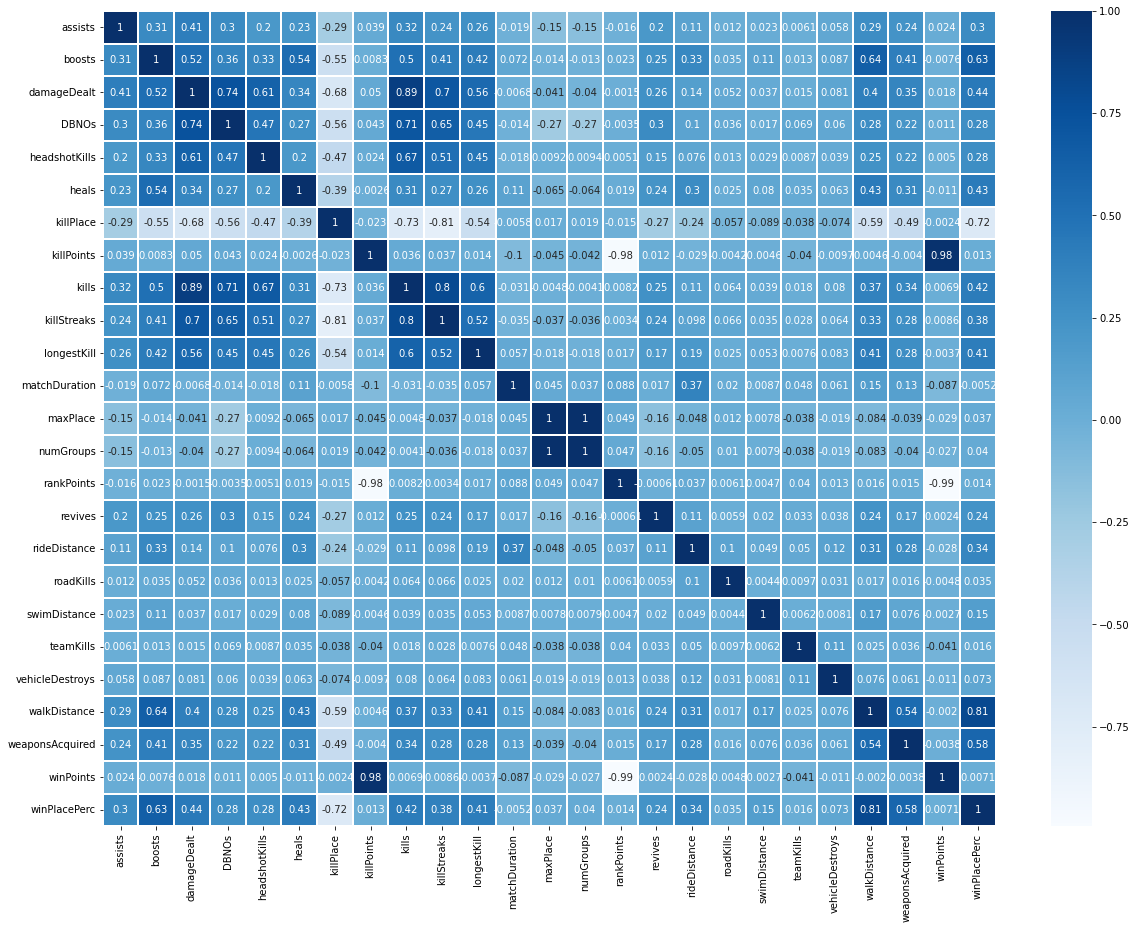

In [61]:
plt.subplots(figsize=(20,15))
sns.heatmap(train.corr(), annot=True, linewidths=2, cmap = 'Blues')

양의 상관관계
- walkDistance (0.81)
- boosts (0.63)
- weaponsAcquired (0.58)
<br><br>

음의 상관관계
- killPlace (-0.72)

In [62]:
train['matchType'].unique()

array(['squad-fpp', 'duo', 'solo-fpp', 'squad', 'duo-fpp', 'solo',
       'normal-squad-fpp', 'crashfpp', 'flaretpp', 'normal-solo-fpp',
       'flarefpp', 'normal-duo-fpp', 'normal-duo', 'normal-squad',
       'crashtpp', 'normal-solo'], dtype=object)

In [63]:
pd.set_option('display.max_columns', 30)

train[(train['matchType'].str.contains('crash')==True)] # 6658 2인

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1093,c8ed6a171536e3,84748458aba82a,d4f1811cf6a04b,1,3,187.375,0,1,6,27,0,1,1,0.800781,904,crashfpp,50,45,1500,0,0.00,0,0.0,0,0,1342.000000,1,0,0.489746
1276,d3c4dd2e585d21,6af9bb6b56b722,16e6befa897b44,0,0,0.000,0,0,0,88,0,0,0,0.000000,892,crashfpp,47,45,1500,0,0.00,0,0.0,0,0,0.000000,0,0,0.000000
1790,28390372a2cc4f,c529d05da4597b,be945f2803814a,0,0,0.000,0,0,0,76,0,0,0,0.000000,915,crashfpp,50,50,1500,0,393.75,0,0.0,0,0,459.500000,0,0,0.204102
1905,fd39e397db5de4,67d1056e060313,ab05fc989cba70,0,2,0.000,0,0,0,44,0,0,0,0.000000,871,crashfpp,47,43,1500,0,6504.00,0,0.0,0,0,326.250000,2,0,0.652344
2111,1f2775b6f994ae,580347c80ae6a3,098b32c9c9ceb3,0,0,0.000,1,0,0,46,0,0,0,0.000000,905,crashfpp,36,33,1500,0,1124.00,0,0.0,1,0,1683.000000,2,0,0.371338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4439168,f2b652c1c3480d,878b4c9a5c6724,f8dbb6134bf6fc,0,0,0.000,0,0,0,92,0,0,0,0.000000,916,crashfpp,49,48,1500,0,0.00,0,0.0,0,0,0.000000,0,0,0.000000
4440338,8df00ec3211cda,52d3feee3ff6d6,c35eb4e9d58f7c,2,0,220.750,0,1,0,18,0,1,1,2.421875,886,crashfpp,46,41,1500,0,1976.00,0,0.0,0,0,866.500000,2,0,1.000000
4440416,03242437424b00,d00910fbc45b1e,510cec3dea92d7,3,4,444.500,2,0,0,2,0,4,2,26.265625,882,crashfpp,31,30,1500,0,5152.00,2,0.0,0,0,23.109375,1,0,0.933105
4440956,9a366526fccde1,7172ba7ef85e3c,a0f8f127c472fc,2,6,219.375,1,0,1,14,0,1,1,1.194336,902,crashfpp,32,31,1500,0,4512.00,0,0.0,0,0,1059.000000,2,0,0.838867


In [64]:
pd.set_option('display.max_columns', 30)

train[(train['matchType'].str.contains('flare')==True)] #3223 4인

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1207,fb785deb59f2bc,4438f77ac9f2e6,33d976b454b843,0,4,577.0000,7,2,4,6,0,4,2,208.500000,1947,flaretpp,26,25,1500,1,2548.0000,0,0.0,0,1,2564.000000,6,0,0.799805
1524,b0fbbe07014fcd,7ce6194a5dd609,e330f44c528e6f,0,0,20.9375,0,0,0,55,0,0,0,0.000000,2031,flarefpp,17,17,1500,0,0.0000,0,0.0,0,0,13.640625,1,0,0.062500
6585,d2c938fa145684,c376a13f2593d4,306b7105f46fb1,0,6,159.7500,2,0,5,4,0,3,2,78.812500,1889,flarefpp,27,25,1500,0,4116.0000,0,0.0,0,0,2340.000000,6,0,0.807617
8033,7ec6701d1a9497,1e7b1e3440d76f,f1a007cdb3948e,0,0,0.0000,0,0,0,71,0,0,0,0.000000,1891,flarefpp,26,26,1500,0,0.0000,0,0.0,0,0,655.000000,10,0,0.239990
12845,4ac8d0521b049c,9abf85145ec8ba,4163d04f4beb17,0,2,56.6875,0,0,1,50,0,0,0,0.000000,1915,flaretpp,26,25,1500,0,5792.0000,0,0.0,0,0,1653.000000,4,0,0.560059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4435289,df3ab1c1b087fd,7312e4825719e0,1a452d3a8d3302,0,5,120.8750,1,0,11,25,0,1,1,166.875000,1808,flaretpp,26,26,1500,0,2314.0000,0,0.0,1,0,3072.000000,10,0,0.720215
4436960,fe7ac3372c0fc2,e6b4302f12b8ed,9bee5835506a78,0,1,36.5625,0,0,1,60,0,0,0,0.000000,1820,flaretpp,27,27,1500,0,0.0000,0,0.0,0,0,1005.000000,2,0,0.269287
4438287,76e9ab41368cc8,5385baa97a54b2,6a646d26225c2d,0,0,0.0000,0,0,4,60,0,0,0,0.000000,1944,flaretpp,24,23,1500,0,0.0007,0,0.0,0,0,2680.000000,4,0,0.478271
4440119,6b8d629cec6ae7,085a3f1a616a83,8fcb66d54bb1a2,0,4,362.5000,1,1,8,21,0,1,1,9.945312,1932,flaretpp,26,26,1500,0,4944.0000,0,0.0,0,0,1965.000000,5,0,0.600098


<AxesSubplot:>

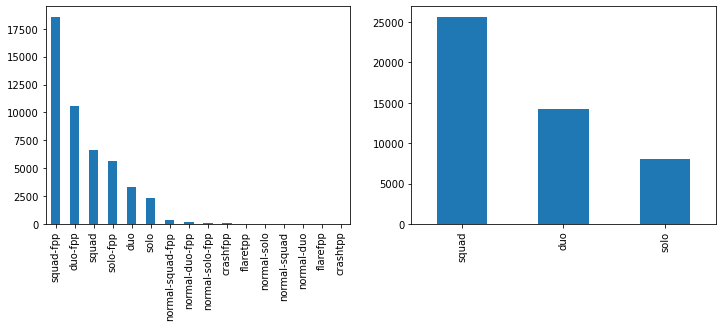

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'] = train['matchType'].apply(mapper)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

<AxesSubplot:>

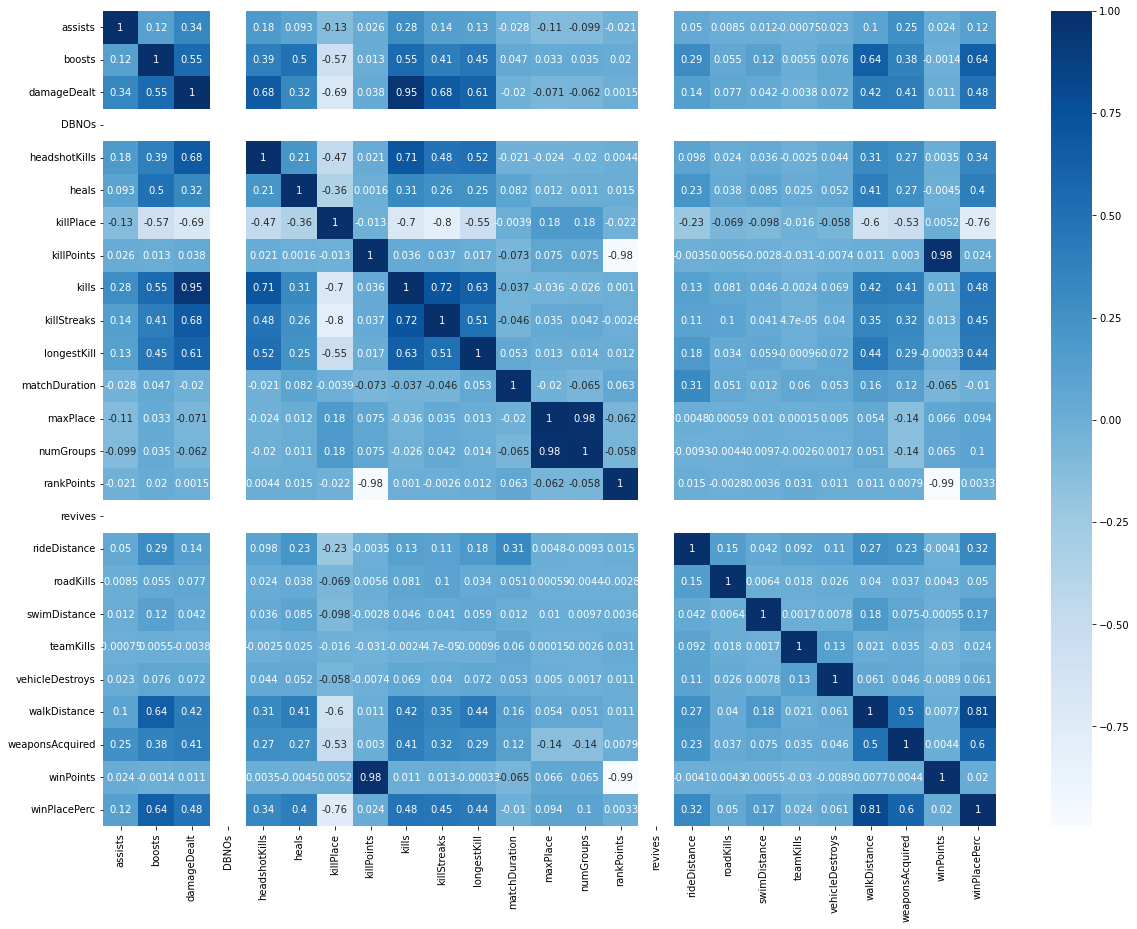

In [66]:
plt.subplots(figsize=(20,15))
sns.heatmap(train[train['matchType']=='solo'].corr(), annot=True, cmap='Blues')

<AxesSubplot:>

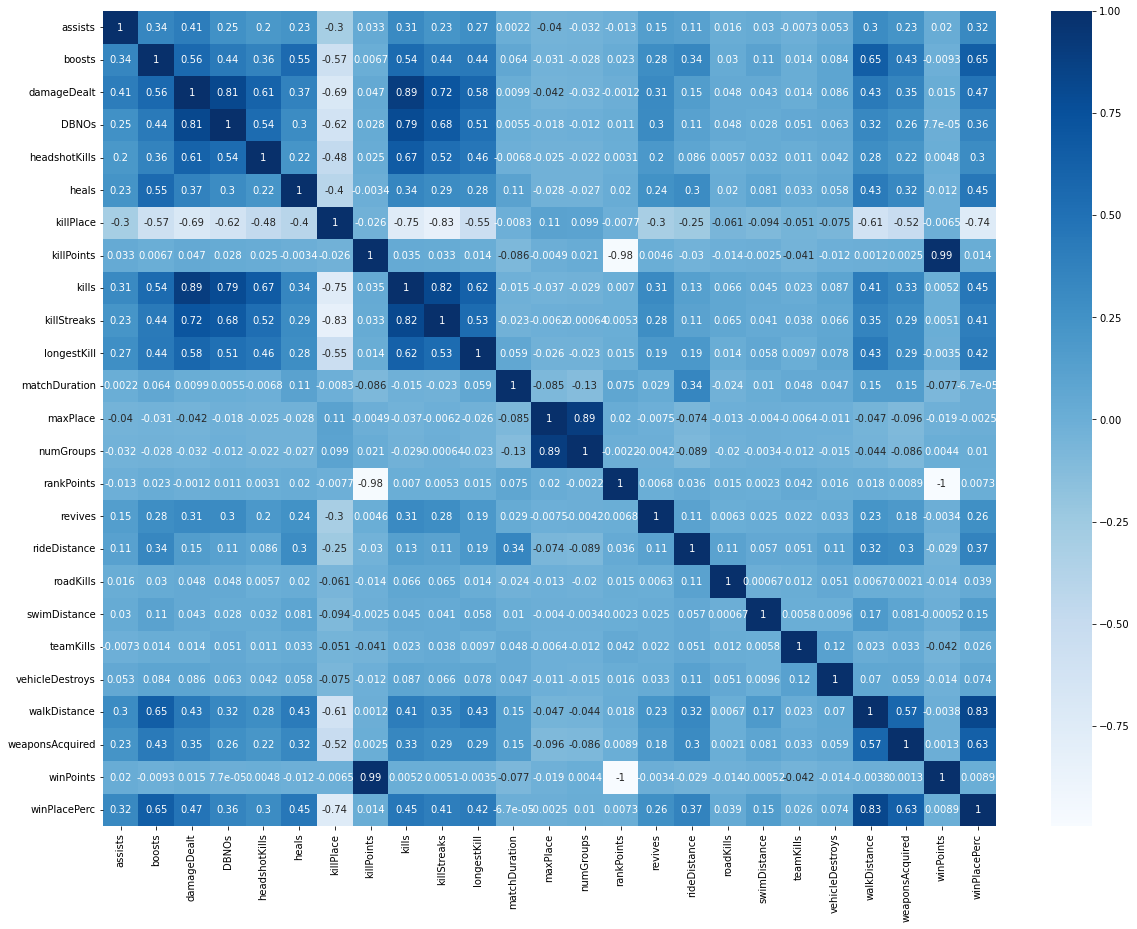

In [67]:
plt.subplots(figsize=(20,15))
sns.heatmap(train[train['matchType']=='duo'].corr(), annot=True, cmap='Blues')

<AxesSubplot:>

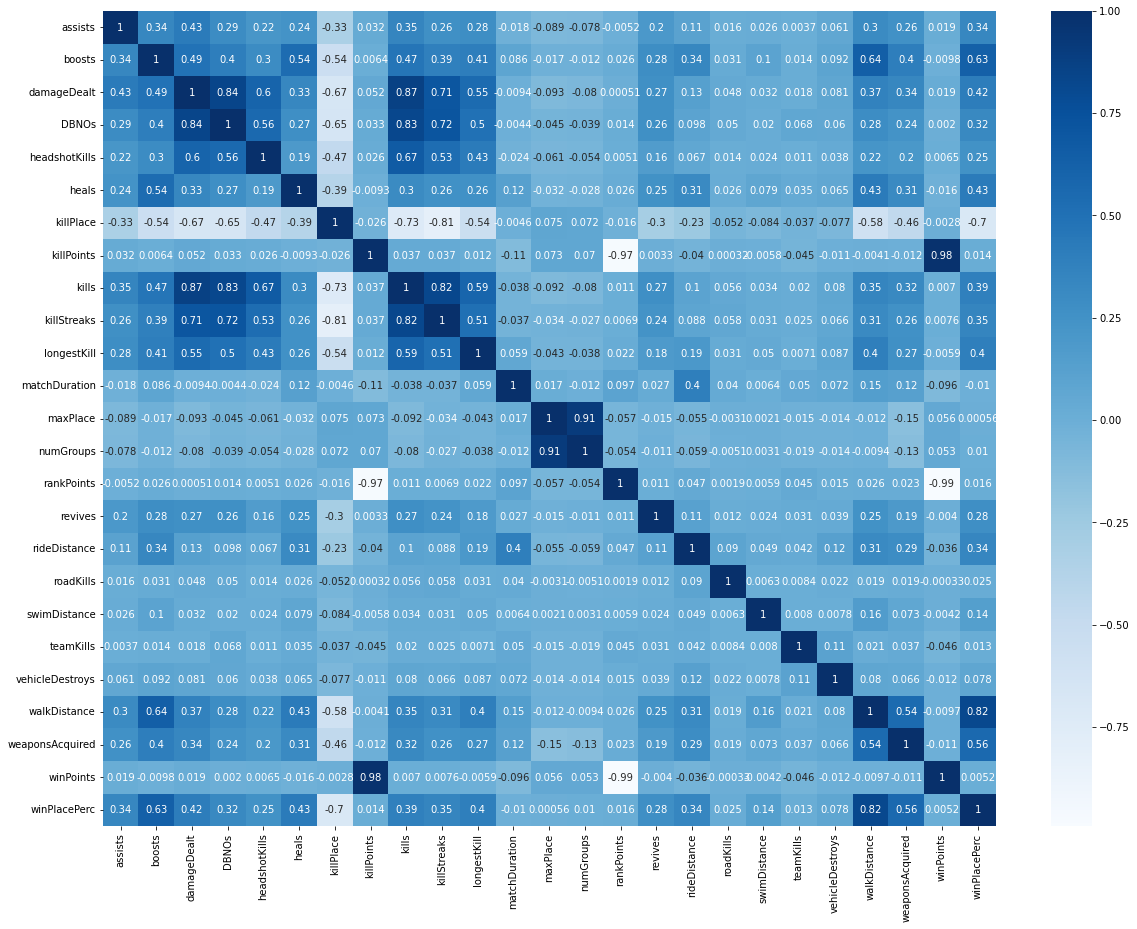

In [68]:
plt.subplots(figsize=(20,15))
sns.heatmap(train[train['matchType']=='squad'].corr(), annot=True, cmap='Blues')

In [69]:
top10 = train[train["winPlacePerc"]>0.9]
print("TOP 10% overview\n")
print("Average number of kills: {:.1f}\nMinimum: {}\nThe best: {}\n95% of players within: {} kills." 
      .format(top10["kills"].mean(), top10["kills"].min(), top10["kills"].max(),top10["kills"].quantile(0.95)))

TOP 10% overview

Average number of kills: 2.6
Minimum: 0
The best: 72
95% of players within: 8.0 kills.


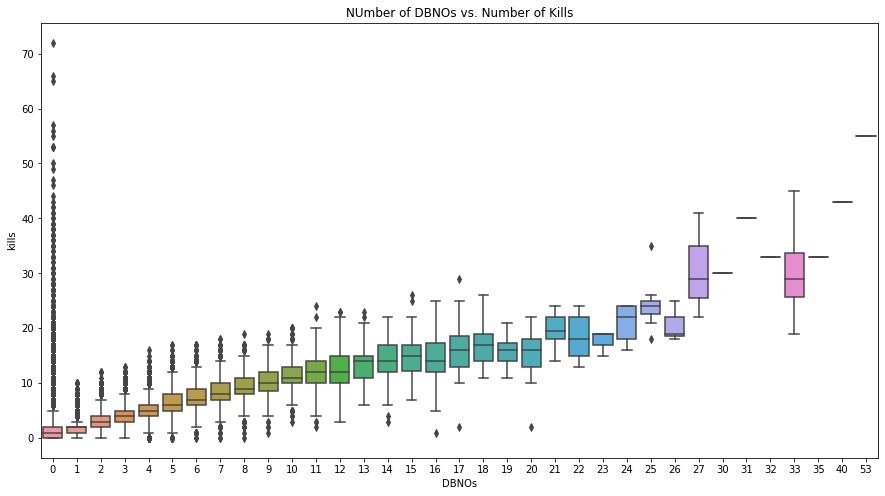

In [70]:
plt.figure(figsize=(15,8))
ax3 = sns.boxplot(x="DBNOs",y="kills", data = top10)
ax3.set_title("NUmber of DBNOs vs. Number of Kills")
plt.show()

<AxesSubplot:>

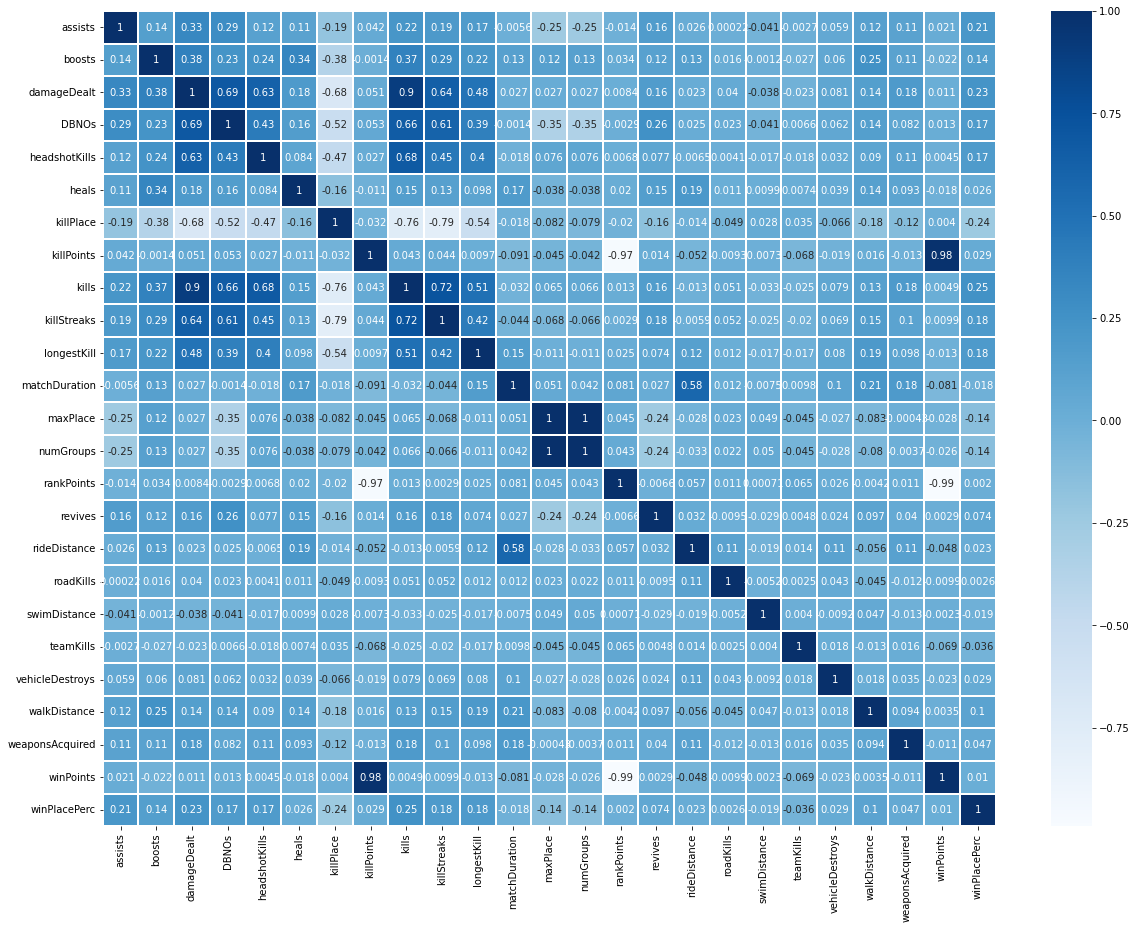

In [71]:
plt.subplots(figsize=(20,15))
sns.heatmap(top10.corr(), annot=True, linewidths=2, cmap = 'Blues')

## Modeling

In [72]:
train = train.drop(columns=['Id', 'groupId', 'matchId','matchType'])

In [73]:
from sklearn.model_selection import train_test_split

X = train.drop(columns='winPlacePerc')
y = train['winPlacePerc']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3557572, 24), (889393, 24), (3557572,), (889393,))

In [74]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [76]:
# from lightgbm.sklearn import LGBMRegressor

In [77]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

0.09257044

In [78]:
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

0.12066963

In [79]:
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.65567e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.09257033

In [80]:
# model = XGBRegressor()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# mean_absolute_error(y_test, pred)

In [81]:
# model = CatBoostRegressor()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# mean_absolute_error(y_test, pred)

In [82]:
data = train.copy()
data.head(10)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.000000,0,0,0,60,1241,0,0,0.00000,1306,28,26,-1,0,0.000000,0,0.000000,0,0,244.7500,1,1466,0.444336
1,0,0,91.500000,0,0,0,57,0,0,0,0.00000,1777,26,25,1484,0,0.004501,0,11.039062,0,0,1434.0000,5,0,0.640137
2,1,0,68.000000,0,0,0,47,0,0,0,0.00000,1318,50,47,1491,0,0.000000,0,0.000000,0,0,161.7500,2,0,0.775391
3,0,0,32.906250,0,0,0,75,0,0,0,0.00000,1436,31,30,1408,0,0.000000,0,0.000000,0,0,202.7500,3,0,0.166748
4,0,0,100.000000,0,0,0,45,0,1,1,58.53125,1424,97,95,1560,0,0.000000,0,0.000000,0,0,49.7500,2,0,0.187500
5,0,0,100.000000,1,1,0,44,0,1,1,18.43750,1395,28,28,1418,0,0.000000,0,0.000000,0,0,34.6875,1,0,0.036987
6,0,0,0.000000,0,0,0,96,1262,0,0,0.00000,1316,28,28,-1,0,0.000000,0,0.000000,0,0,13.5000,1,1497,0.000000
7,0,0,8.539062,0,0,0,48,1000,0,0,0.00000,1967,96,92,-1,0,2004.000000,0,0.000000,0,0,1089.0000,6,1500,0.736816
8,0,0,51.593750,0,0,0,64,0,0,0,0.00000,1375,28,27,1493,0,0.000000,0,0.000000,0,0,800.0000,4,0,0.370361
9,0,0,37.281250,0,0,0,74,0,0,0,0.00000,1930,29,27,1349,0,0.000000,0,0.000000,0,0,65.6875,1,0,0.214355


In [83]:
data.drop(['rankPoints'], axis=1, inplace=True)
data.drop(['roadKills'], axis=1, inplace=True)
data.drop(['matchDuration'], axis=1, inplace=True)
data.drop(['teamKills'], axis=1, inplace=True)

In [84]:
from sklearn.model_selection import train_test_split

X = data.drop(columns='winPlacePerc')
y = data['winPlacePerc']

X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.2, random_state=100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3557572, 20), (889393, 20), (3557572,), (889393,))

In [85]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

0.09682699

In [86]:
model = Lasso()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

0.12611459

In [87]:
model = Ridge()
model.fit(X_train, y_train)
pred = model.predict(X_test)
mean_absolute_error(y_test, pred)

/Users/sanghyun/miniforge3/envs/yeardream/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.82682e-09): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


0.096826814

In [88]:
# model = XGBRegressor()
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# mean_absolute_error(y_test, pred)

In [89]:
train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [90]:
pd.set_option('display.max_columns', 30)

train.head(5)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00000,0,0,0,60,1241,0,0,0.00000,1306,28,26,-1,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,0,0,91.50000,0,0,0,57,0,0,0,0.00000,1777,26,25,1484,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1,0,68.00000,0,0,0,47,0,0,0,0.00000,1318,50,47,1491,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,0,0,32.90625,0,0,0,75,0,0,0,0.00000,1436,31,30,1408,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,0,0,100.00000,0,0,0,45,0,1,1,58.53125,1424,97,95,1560,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


In [91]:
mydata.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,1241,0,0,0.00000,1306,squad-fpp,28,26,-1,0,0.000000,0,0.000000,0,0,244.75,1,1466,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,0,0,0,0.00000,1777,squad-fpp,26,25,1484,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,0,0,0,0.00000,1318,duo,50,47,1491,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,0,0,0,0.00000,1436,squad-fpp,31,30,1408,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,0,1,1,58.53125,1424,solo-fpp,97,95,1560,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


In [92]:
# 내 담당 칼럼을 제외하고 모두 드랍

# Q)  조건 설정된 칼럼 제외한 모든 칼럼 drop하는 코드가 있을 것같은데..

mydata.drop(['Id'], axis=1, inplace=True)
mydata.drop(['groupId'], axis=1, inplace=True)
mydata.drop(['matchId'], axis=1, inplace=True)
mydata.drop(['assists'], axis=1, inplace=True)
mydata.drop(['boosts'], axis=1, inplace=True)
mydata.drop(['damageDealt'], axis=1, inplace=True)
mydata.drop(['DBNOs'], axis=1, inplace=True)
mydata.drop(['headshotKills'], axis=1, inplace=True)
mydata.drop(['heals'], axis=1, inplace=True)
mydata.drop(['killPlace'], axis=1, inplace=True)
mydata.drop(['killPoints'], axis=1, inplace=True)
mydata.drop(['kills'], axis=1, inplace=True)
mydata.drop(['killStreaks'], axis=1, inplace=True)
mydata.drop(['longestKill'], axis=1, inplace=True)
mydata.drop(['matchDuration'], axis=1, inplace=True)
mydata.drop(['maxPlace'], axis=1, inplace=True)
mydata.drop(['numGroups'], axis=1, inplace=True)
mydata.drop(['rankPoints'], axis=1, inplace=True)
mydata.drop(['revives'], axis=1, inplace=True)
mydata.drop(['roadKills'], axis=1, inplace=True)
mydata.drop(['teamKills'], axis=1, inplace=True)
mydata.drop(['winPoints'], axis=1, inplace=True)

mydata.head(5)

,matchType,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,squad-fpp,0.000000,0.000000,0,244.75,1,0.444336
1,squad-fpp,0.004501,11.039062,0,1434.00,5,0.640137
2,duo,0.000000,0.000000,0,161.75,2,0.775391
3,squad-fpp,0.000000,0.000000,0,202.75,3,0.166748
4,solo-fpp,0.000000,0.000000,0,49.75,2,0.187500


In [93]:
mydata['matchType']

0          squad-fpp
1          squad-fpp
2                duo
3          squad-fpp
4           solo-fpp
             ...    
4446961    squad-fpp
4446962         solo
4446963    squad-fpp
4446964    squad-fpp
4446965     solo-fpp
Name: matchType, Length: 4446966, dtype: object

In [94]:
## matchType 전처리


# matchType2라는 칼럼을 생성
mydata['matchType2'] = pd.NaT

# row가 많아서 생기는 메모리 에러 무시하고 진행
pd.set_option('mode.chained_assignment',  None)


# squad, duo, solo 통합
maplist = {
    'squad' : 'squad',
    'duo' : 'duo',
    'solo' : 'solo'
}

for i in maplist:
  mydata.matchType2[(mydata['matchType'].str.contains(i)==True)&(mydata['matchType2'].isnull())]=maplist.get(i)


# solo ⮕ 1, duo ⮕ 2, squad ⮕ 4의 vector로 전환
def convert(x):
    if x == "squad":
        return 4
    elif x == "duo":
        return 2
    else:
        return 1
    
mydata['matchType2'] = mydata['matchType2'].map(convert)

# 기존의 matchType drop
mydata.drop(['matchType'], axis=1, inplace=True)

# matchType2 rename, reindex
mydata.rename(columns = {'matchType2':'matchType'}, inplace = True)
mydata = mydata.reindex(columns=['matchType','rideDistance', 'swimDistance','walkDistance','vehicleDestroys','weaponsAcquired','winPlacePerc'])

mydata.head(10)

,matchType,rideDistance,swimDistance,walkDistance,vehicleDestroys,weaponsAcquired,winPlacePerc
0,4,0.000000,0.000000,244.7500,0,1,0.444336
1,4,0.004501,11.039062,1434.0000,0,5,0.640137
2,2,0.000000,0.000000,161.7500,0,2,0.775391
3,4,0.000000,0.000000,202.7500,0,3,0.166748
4,1,0.000000,0.000000,49.7500,0,2,0.187500
5,4,0.000000,0.000000,34.6875,0,1,0.036987
6,4,0.000000,0.000000,13.5000,0,1,0.000000
7,1,2004.000000,0.000000,1089.0000,0,6,0.736816
8,4,0.000000,0.000000,800.0000,0,4,0.370361
9,4,0.000000,0.000000,65.6875,0,1,0.214355


<AxesSubplot:>

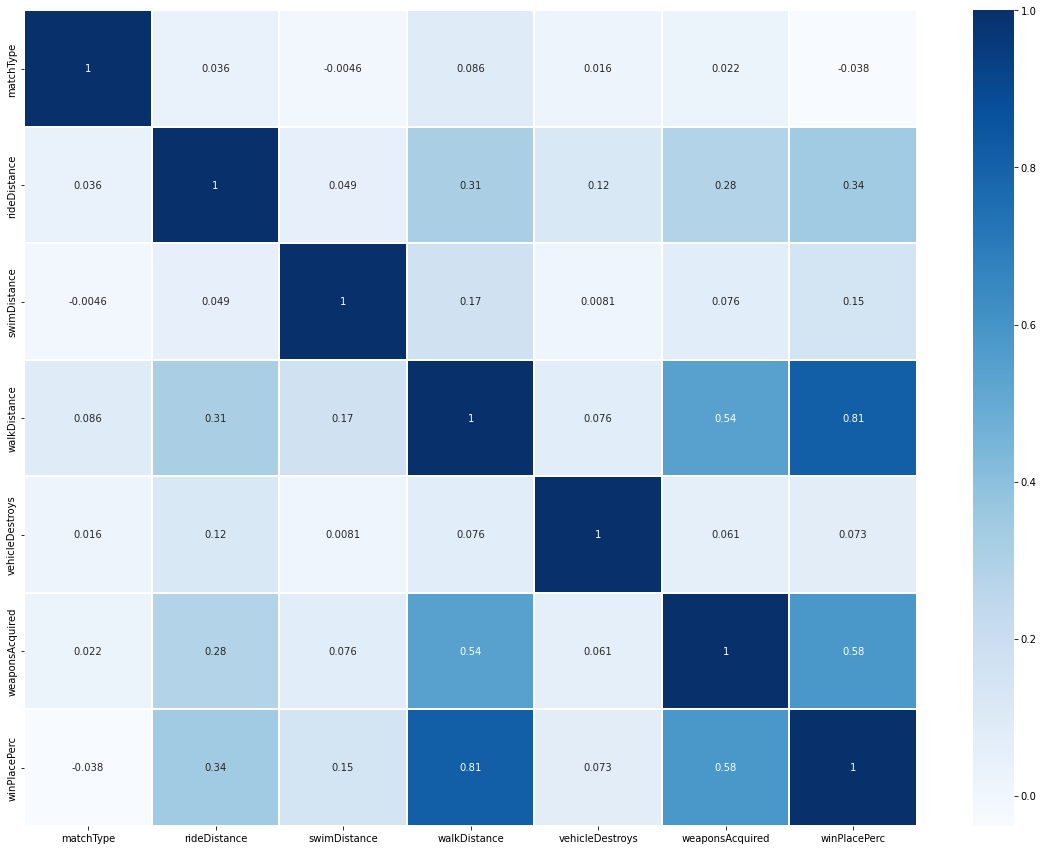

In [95]:
plt.subplots(figsize=(20,15))
sns.heatmap(mydata.corr(), annot=True, linewidths=2, cmap = 'Blues')

In [96]:
# 거리
mydata['rideAndswim'] = mydata['rideDistance'] + mydata['swimDistance']
mydata['rideAndwalk'] = mydata['rideDistance'] + mydata['walkDistance']
mydata['swimAndwalk'] = mydata['swimDistance'] + mydata['walkDistance']
mydata['totalDistance'] = mydata['rideAndswim'] + mydata['walkDistance']

mydata = mydata.reindex(columns=['matchType','rideDistance', 'swimDistance','walkDistance','rideAndswim','rideAndwalk','swimAndwalk','totalDistance','vehicleDestroys','weaponsAcquired','winPlacePerc'])


mydata.head(10)

,matchType,rideDistance,swimDistance,walkDistance,rideAndswim,rideAndwalk,swimAndwalk,totalDistance,vehicleDestroys,weaponsAcquired,winPlacePerc
0,4,0.000000,0.000000,244.7500,0.000000,244.7500,244.7500,244.7500,0,1,0.444336
1,4,0.004501,11.039062,1434.0000,11.046875,1434.0000,1445.0000,1445.0000,0,5,0.640137
2,2,0.000000,0.000000,161.7500,0.000000,161.7500,161.7500,161.7500,0,2,0.775391
3,4,0.000000,0.000000,202.7500,0.000000,202.7500,202.7500,202.7500,0,3,0.166748
4,1,0.000000,0.000000,49.7500,0.000000,49.7500,49.7500,49.7500,0,2,0.187500
5,4,0.000000,0.000000,34.6875,0.000000,34.6875,34.6875,34.6875,0,1,0.036987
6,4,0.000000,0.000000,13.5000,0.000000,13.5000,13.5000,13.5000,0,1,0.000000
7,1,2004.000000,0.000000,1089.0000,2004.000000,3092.0000,1089.0000,3092.0000,0,6,0.736816
8,4,0.000000,0.000000,800.0000,0.000000,800.0000,800.0000,800.0000,0,4,0.370361
9,4,0.000000,0.000000,65.6875,0.000000,65.6875,65.6875,65.6875,0,1,0.214355


<AxesSubplot:>

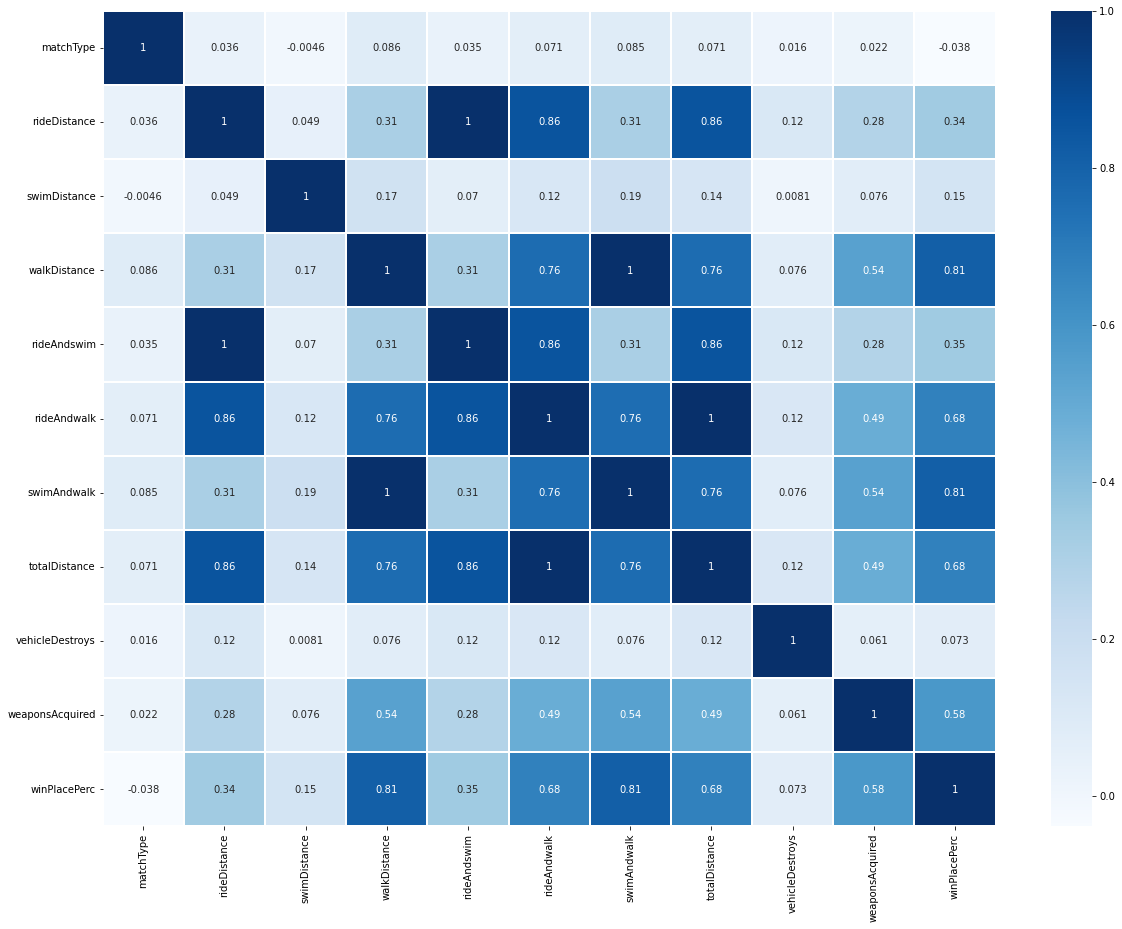

In [97]:
plt.subplots(figsize=(20,15))
sns.heatmap(mydata.corr(), annot=True, linewidths=2, cmap = 'Blues')

## To do list

- Min-Max Scaling / Standard Scaling (Distance)
- if vehicleDestroys == 1  => winPlacePerc
- Mode : rank, nomal, event
- 